# Comparing axis-aligned decision tree versus oblique decision tree on MNIST dataset
Here we extend our analysis beyound our previous `Iris` and `simulations` datasets to measure performance of our oblique forest against random forset on MNIST dataset. We are testing on the digit data from scikit-learn.

## Environment
- Python 3.8.13
- [Sklearn-Adam's dev branch](https://github.com/neurodata/scikit-learn/tree/obliquepr)

In [1]:
!python --version

Python 3.8.13


## Import packages

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, ObliqueDecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ObliqueRandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import RepeatedKFold, cross_validate

from collections import Counter
from datetime import datetime
from tqdm import tqdm
import itertools
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 123456

sklearn.__version__

'1.2.dev0'

In [3]:
today = str(datetime.now().date())
today

'2022-05-29'

#### Load `digit` dataset from dataset module

In [4]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data.data.shape, data.target.shape

((1797, 64), (1797,))

In [6]:
X = data.data
y = data.target

Text(0.5, 1.0, '0')

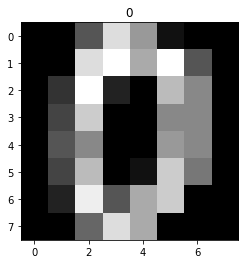

In [7]:
plt.imshow(X[0,:].reshape(8,8), cmap='gray')
plt.title(y[0])

In [8]:
XX, _, yy, _ = train_test_split(X, y, test_size=0.9, random_state=random_state)
Counter(y), Counter(yy)

(Counter({0: 178,
          1: 182,
          2: 177,
          3: 183,
          4: 181,
          5: 182,
          6: 181,
          7: 179,
          8: 174,
          9: 180}),
 Counter({8: 16,
          7: 16,
          1: 15,
          9: 15,
          2: 12,
          0: 27,
          6: 17,
          3: 22,
          5: 24,
          4: 15}))

In [9]:
clf = RandomForestClassifier(max_features=None, random_state=random_state)
cross_val_score(clf, X=XX, y=yy, cv=10, scoring='accuracy').mean()

0.8428104575163398

In [10]:
clf = ObliqueRandomForestClassifier(max_features=None, random_state=random_state)
cross_val_score(clf, X=XX, y=yy, cv=10, scoring='accuracy').mean()

0.9316993464052287

In [11]:
max_features = ['sqrt', X.shape[1], X.shape[1]*2, X.shape[1]*3]

output = []

for mf in max_features:
    tmp = [f'{mf}']

    if mf == 'sqrt':
        clf = RandomForestClassifier(max_features=mf, random_state=random_state)
    else:
        clf = RandomForestClassifier(max_features=None, random_state=random_state)

    cv_score = cross_val_score(clf, X=XX, y=yy, cv=10, scoring='accuracy')
    tmp.append(cv_score)

    clf = ObliqueRandomForestClassifier(max_features=mf, random_state=random_state)
    cv_score = cross_val_score(clf, X=XX, y=yy, cv=10, scoring='accuracy')
    tmp.append(cv_score)
    
    output.append(tmp)

In [12]:
df_out = pd.DataFrame(output, columns=['max_features', 'RF', 'OF'])

In [13]:
df_out = df_out.explode(['RF','OF'])
df_out.head(5)

,max_features,RF,OF
0,sqrt,0.888889,0.944444
0,sqrt,0.944444,1.0
0,sqrt,0.888889,0.944444
0,sqrt,1.0,1.0
0,sqrt,0.833333,0.833333


In [14]:
df_out['delta'] = df_out.apply(lambda x: x.OF-x.RF, axis=1)

<AxesSubplot:xlabel='max_features', ylabel='delta'>

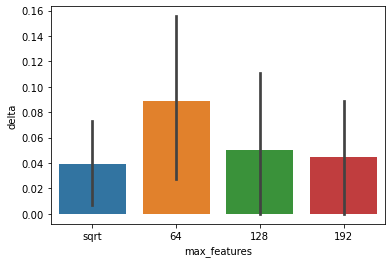

In [15]:
sns.barplot(data=df_out, x='max_features', y='delta')